# Functional Underpinnings of Reading
**Author**: Noelani Luckas

*Student ID*: 2852989 

**Date**: 26.11.2024 


**Link**: [Neurosynth: Reading](https://neurosynth.org/analyses/terms/reading/)



### Step 1: Download fMRI Data 

Download Neurosynth-Reading data at [Neurosynth: Reading](https://neurosynth.org/analyses/terms/reading/).




### Step 2: Set up Conda Environment

1) Set up conda environment by opening a new terminal and creating "assign_neurosynth" environment and activate it (*conda create -n assign_neurosynth python=3.12.4 -y && conda activate assign_neurosynth*)
2) Within activated conda environment, *pip install nilearn nibabel matplotlib pandas scipy*
3) Import necessary packages in the code.

In [25]:
import os
import glob

import nibabel as nib
from nilearn import plotting
from nilearn import image

import numpy as np
import matplotlib.pyplot as plt

### Step 3: Write your Code

#### Set Base Directory 

Firstly, use os.getcwd() to receive the current working directory ("Homeassign_Prog") and set it as the base directory for the later code. Here, make sure that the files downloaded from Neurosynth are in the same folder as the code. 
Furthermore, use glob to locate the files with an ending of "nii" in the current directory. Initialize both anatomical and uniformity file under "None" for better overview during the printing of the file names later. Now, loop through the MRI files located earlier, assigning by start of "anatomical" and "uniformity." 
Finally, print the located files. If the file is wrongly assigned or does not exist, the print should inform about this. 

In [26]:
# Base directory as current working directory
base_dir = os.getcwd()

# Locate all .nii files in the current dir.
mri_files = glob.glob("*.nii")

# Initialize variables for specific files
anatomical_file = None
uniformity_file = None

# Loop through the files and assign based on starting word
for file in mri_files:
    if file.startswith("anatomical"):
        anatomical_file = os.path.join(base_dir, file)
    elif file.startswith("uniformity"):
        uniformity_file = os.path.join(base_dir, file)

# Print the located files
print("Located files:")
if anatomical_file and os.path.exists(anatomical_file):
    print(f"Anatomical file: {anatomical_file}")
else:
    print("Anatomical file not found.")

if uniformity_file and os.path.exists(uniformity_file):
    print(f"Uniformity test file: {uniformity_file}")
else:
    print("Uniformity test file not found.")


Located files:
Anatomical file: /Users/noelani/Downloads/Programming_Psychologist_Course/neurosynth-project/anatomical_reading.nii
Uniformity test file: /Users/noelani/Downloads/Programming_Psychologist_Course/neurosynth-project/uniformity_reading.nii


#### Load Images

Load the previously created files (anatomical_file and uniformity_file) using nibabel (nib). These are named anat_img for the background of the visualization later, and func_img for the overlay later. 

In [27]:
# Background
anat_img = nib.load(anatomical_file)

# Overlay
func_img = nib.load(uniformity_file)

#### Plot your data
Plot the data that was just loaded. As mentioned, the functional MRI data (func_img) serves as the overlay to the anatomical background (anat_img). 

1) To set the *anat_img* as the background, define bg_img=anat_img. 
2) Set a title.
3) Change the color map to jet (cmap="jet") to dampen the stark colors.
4) Set the threshold for significance to 0.1. Values below this level will be excluded. 
5) Although these are the default values, set display_mode to "ortho" to make sure that three slices of the brain are shown (coronal, sagittal, and axial). 
6) Add the coordinates in which the cut is shown (again, the values are the same as in default, but to be certain they are visualized correclty in other operating systems, they are included). 
7) Similarly, set draw_cross=True to ensure the center of activity is visualized. If the image is preferred without the center crossing, then set draw_cross=False. 
8) Finally, although this is also the default value, set the background to black (black_bg=True) to ensure that there is a contrast between the visualization and the background.


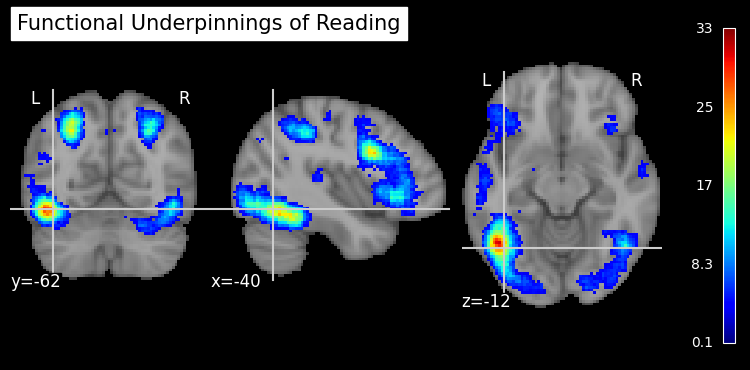

In [28]:
plotting.plot_stat_map(uniformity_file, 
                       bg_img=anatomical_file,
                       title="Functional Underpinnings of Reading",
                       cmap="jet",
                       threshold=0.1,
                       display_mode="ortho",
                       cut_coords=(-40, -62, -12),
                       draw_cross=True,
                       black_bg=True)
plotting.show()


#### Visualize in a histogram

Load the uniformity file (= functional data). Use get_f.data() on the functional data to create a NumPy array and only select positive values. Plot the histogram with desired customizations (s.b.)


##### Desired customizations: 
1) Adjust the figure size to fit the behavior of the data. 
2) Create appropriate number of bins for the visualized data (here, bin=20). Also add the color of the bins (color ="b") as well as their edgecolor (edgecolor ="darkorange") to fit the jet theme of the aforeshown fMRI visualization. 
3) Set the title to "Positive Values in Functional Data". Adjust desired font size. 
4) Set the y-label to "Voxel Intensity" and the x-label to "Frequency". Again, adjust desired font size. 
5) Add a grid for better overview. To minimize the overlay, set alpha to 0.5 and use a lined linestyle ("--").
6) Utilize .tight_layout() function to clean up any missing customizations and show plot.


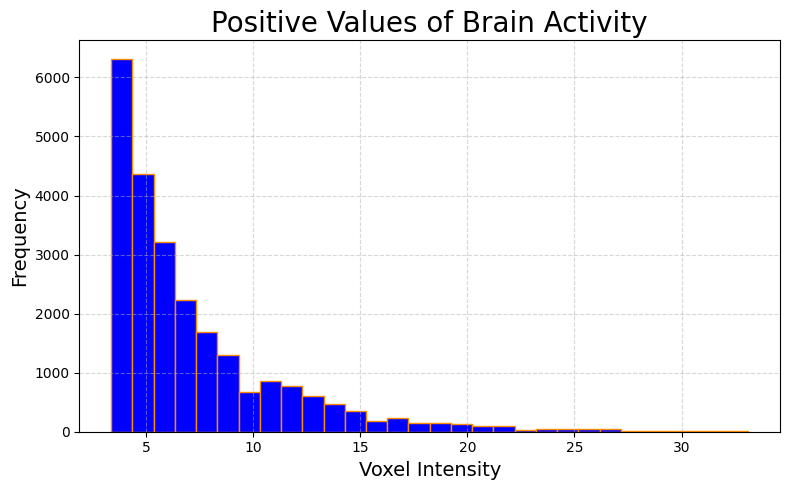

In [31]:
if not os.path.exists(uniformity_file):
    raise FileNotFoundError(f"File not found: {uniformity_file}")
functional_data = nib.load(uniformity_file)

data_array = functional_data.get_fdata()
positive_values = data_array[data_array > 0]

plt.figure(figsize=(8, 5))
plt.hist(positive_values.ravel(), bins=30, color="b", edgecolor="darkorange")


# Set titles and labels
plt.title("Positive Values of Brain Activity", fontsize=20)
plt.xlabel("Voxel Intensity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add grid
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()

### Step 4: Upload Code to GitHub

1) go to www.github.com and open a new repository. Name it "neurosynth-project" or any other preferable name. 
2) In a new terminal, clock on the plus sign and click "bash" (or Git Bash in Windows). Now, clone the new repository into your terminal using the URL (git clone URL.git)
3) Commit changes to local repo and push into GitHub repo. 
4) Within GitHub, go to pull requests and create pull requests. Set title, write a message, and commit. 
